In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
def drop_col_nums(df, col_list):
    # drop column by index and return the dataframe
    return df.drop([df.columns[col] for col in col_list], axis =1)
    

In [3]:
# source: https://data.cityofnewyork.us/Environment/Water-Consumption-In-The-New-York-City/ia2d-e54m
death = pd.read_csv("New_York_City_Leading_Causes_of_Death.csv")

# source: https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam/data
water = pd.read_csv("Water_Consumption_In_The_New_York_City.csv")

In [4]:
flu_name = "Influenza (Flu) and Pneumonia (J09-J18)"
death_flu = death[death['Leading Cause'] == flu_name]

In [5]:
death_flu.head()

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
14,2008,Influenza (Flu) and Pneumonia (J09-J18),F,Not Stated/Unknown,14,.,.
26,2013,Influenza (Flu) and Pneumonia (J09-J18),F,Not Stated/Unknown,18,.,.
38,2007,Influenza (Flu) and Pneumonia (J09-J18),F,Not Stated/Unknown,.,.,.
46,2014,Influenza (Flu) and Pneumonia (J09-J18),F,White Non-Hispanic,563,39.7,20.4
50,2012,Influenza (Flu) and Pneumonia (J09-J18),M,Asian and Pacific Islander,76,14.1,20.9


In [6]:
# keep only the last column
water_per_capita = drop_col_nums(water, [1,2])

In [7]:
water_per_capita['Per Capita(Gallons per person per day)'] = water_per_capita['Per Capita(Gallons per person per day)'].astype(float)

In [9]:
water_per_capita.head()

,Year,Per Capita(Gallons per person per day)
0,1979,213.0
1,1980,213.0
2,1981,185.0
3,1982,194.0
4,1983,198.0


In [10]:
# drop columns not used
death_adj_rate_flu = drop_col_nums(death_flu, [1,2,3,4,5])

In [11]:
# clean '.' and NaN
death_adj_rate_flu = death_adj_rate_flu[death_adj_rate_flu!='.'].dropna()

In [12]:
# set the type to numeric
death_adj_rate_flu['Age Adjusted Death Rate'] = death_adj_rate_flu['Age Adjusted Death Rate'].astype(float)

In [13]:
# group by year and take average across different races & sexes
avg_death_adj_rate_flu = death_adj_rate_flu.groupby('Year').mean()

In [14]:
# merge the two data frames by year
merged_df = pd.merge(water_per_capita, avg_death_adj_rate_flu, on='Year').set_index('Year')

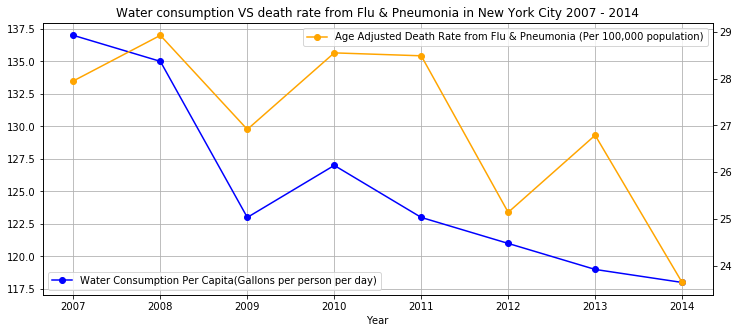

In [16]:
plt.figure(figsize=(12,5))
plt.title("Water consumption VS death rate from Flu & Pneumonia in New York City 2007 - 2014")
plt.xlabel('Year')

ax1 = merged_df['Per Capita(Gallons per person per day)'].plot(color='blue', grid=True, marker='o', label='Water Consumption Per Capita(Gallons per person per day)')
ax2 = merged_df['Age Adjusted Death Rate'].plot(color='orange', grid=True, secondary_y=True, marker='o',label='Age Adjusted Death Rate from Flu & Pneumonia (Per 100,000 population)')

ax1.legend(loc=3)
ax2.legend(loc=1)

plt.show()

This plot shows the relationship between water consumption per capita and the age adjusted death rate from Flu & Pneumonia in New York City. I was always told that drinking plenty of water helps fighting flu throughout my childhood. Nevertheless, this graph shows that as water consumption per capital is going down in recent years, the death rate from flu & pneumonia is also decreasing. My reasoning is that improved healthcare might contribute to the dropped death rate. Meanwhile, water consumption is not all about drinking. More detailed data is needed to explore this topic.